### Data Science

### Classification : breast cancer dataset

In [2]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [129]:
cancer = load_breast_cancer()

### Data exploration

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [216]:
# A bit about breast_cancer
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
import pandas as pd

In [118]:
X_train=cancer.data  #feature matrix
X_test= cancer.target  #response vector

In [46]:
print(X_train.shape) # data feature shape 
print(X_test.shape) #  print target(or label)shape

(569, 30)
(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [17]:
cancer.target_names  # print the label 

array(['malignant', 'benign'], dtype='<U9')

In [9]:
cancer.feature_names  # print the feature's names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [110]:
df = pd.DataFrame(X_train, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,0.06688,...,15.05,24.75,99.17,688.6,0.1264,0.2037,0.1377,0.06845,0.2249,0.08492
1,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,...,20.01,19.52,134.90,1227.0,0.1255,0.2812,0.2489,0.14560,0.2756,0.07919
2,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,...,14.20,29.20,92.94,621.2,0.1140,0.1667,0.1212,0.05614,0.2637,0.06658
3,10.48,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,...,11.48,29.46,73.68,402.8,0.1515,0.1026,0.1181,0.06736,0.2883,0.07748
4,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,0.06766,...,13.24,27.29,92.20,546.1,0.1116,0.2813,0.2365,0.11550,0.2465,0.09981


### Data classification

In [255]:
# Splitting Data 
X_train, X_test, y_train , y_test = train_test_split(
    cancer.data, cancer.target,# stratify=cancer.target,
    random_state=42,test_size=0.25)

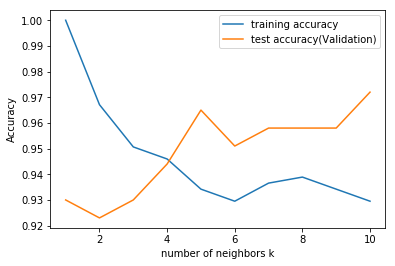

In [256]:
# Create training and testing datasets

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_list = range(1, 11)

for k in neighbors_list:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=k)
    # fitting the model with the data
    knn.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_list,
         training_accuracy, label="training accuracy")
plt.plot(neighbors_list,
        test_accuracy, label="test accuracy(Validation)")
plt.ylabel("Accuracy")
plt.xlabel("number of neighbors k")
plt.legend()

In [259]:
print("Acc(test) score: ",test_accuracy, "\n")
print("Training score : ",training_accuracy)


Acc(test) score:  [0.9300699300699301, 0.9230769230769231, 0.9300699300699301, 0.9440559440559441, 0.965034965034965, 0.951048951048951, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.972027972027972] 

Training score :  [1.0, 0.9671361502347418, 0.9507042253521126, 0.9460093896713615, 0.9342723004694836, 0.9295774647887324, 0.9366197183098591, 0.9389671361502347, 0.9342723004694836, 0.9295774647887324]


In [258]:
0.9460093896713615 -  0.9440559440559441

0.0019534456154174373

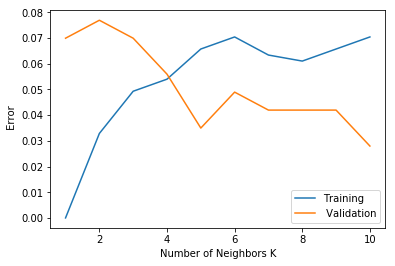

In [260]:
# Plotting the validation graph in term of error
MSE = [1 - x for x in training_accuracy]
test_error = [1 - x for x in test_accuracy]

# plot the error vs k
plt.plot(neighbors_list, MSE, 
         label="Training")
plt.plot(neighbors_list, test_error, 
         label=" Validation")

plt.xlabel('Number of Neighbors K')
plt.ylabel(' Error')
plt.legend()



In [263]:
##Prediction
knn = KNeighborsClassifier( n_neighbors=6)
knn.fit(X_train, y_train)
l=range(1,31)
knn.predict([l])  #  1 : malign ; 0 : benign

array([1])